# Data Wrangling with Pandas

This notebook is a tutorial on manipulating csv and other tabular data in Pandas.

In [1]:
# import packages

import pandas as pd
import datetime
import numpy as np

### Problem
The dataset that we are importing is sloppy. It is a ".data" file that has a useless header, several rows at the bottom with attribute data, and all the values for each year are on a single row, separated by spaces.

This is the MEI version 2 data from https://psl.noaa.gov/enso/mei/ which gives the multivariate ENSO index. Ideally, we want this data to be indexed by date, so we need to do some work to it first.

#### Import Data
We use the .read_csv() function to import data. Replace the path with your own filepath. Then we print out the dataset by calling its assigned variable, in order to see the structure of the data. Not nice to work with as is.

In [2]:
# import dataset
df = pd.read_csv('/home/croufa/datasciprojects/data_science_for_the_geosciences/lecture_examples/06_pandas/meiv2.data')
df

,1979 2024
0,1979 0.47 0.29 -0.05 0.21 0...
1,1980 0.33 0.20 0.39 0.51 0...
2,1981 -0.36 -0.23 0.33 0.43 -0...
3,1982 -0.43 -0.49 -0.27 -0.36 -0...
4,1983 2.48 2.68 2.61 2.76 2...
5,1984 -0.54 -0.56 -0.16 0.07 -0...
6,1985 -0.25 -0.58 -0.60 -0.76 -1...
7,1986 -0.40 -0.34 -0.40 -0.53 -0...
8,1987 1.03 1.16 1.57 1.74 1...
9,1988 0.63 0.33 0.17 -0.01 -0...


#### Remove Rows
First we want to remove the attribute rows. The .iloc Pandas function allows integer-based indexing (as opposed to .loc, which uses label based indexing). Instead of removing rows, we are selecting all of the rows except for the last 4.

In [3]:
# select all but the last 4 rows of the dataset
df = df.iloc[:-4]
df

,1979 2024
0,1979 0.47 0.29 -0.05 0.21 0...
1,1980 0.33 0.20 0.39 0.51 0...
2,1981 -0.36 -0.23 0.33 0.43 -0...
3,1982 -0.43 -0.49 -0.27 -0.36 -0...
4,1983 2.48 2.68 2.61 2.76 2...
5,1984 -0.54 -0.56 -0.16 0.07 -0...
6,1985 -0.25 -0.58 -0.60 -0.76 -1...
7,1986 -0.40 -0.34 -0.40 -0.53 -0...
8,1987 1.03 1.16 1.57 1.74 1...
9,1988 0.63 0.33 0.17 -0.01 -0...


#### Export to CSV
In order to make it easier to continue to work with the data, we need to be able to separate the data into different columns, instead of having one column of data with all the months and year crammed in there. So we will export what we have done to a CSV file, setting index to False to prevent a new index column from being created.

In [4]:
df.to_csv('/home/croufa/datasciprojects/data_science_for_the_geosciences/lecture_examples/06_pandas/meiv2.csv', index=False)

#### Read in new CSV
Now we can read in our new CSV file. We'll assign it the variable "mei." Arguments when we import will help us separate the data into columns using the sep='\s+' which says to separate values that have one or more spaces between them. We will also set the header equal to "None" and skip the first row (0th row) in order to remove the header, since simply using the header argument assigns the data to a row. The names argument allows us to assign column names to our dataset, in this case, year and values for each month of the year.

In [5]:
mei = pd.read_csv('/home/croufa/datasciprojects/data_science_for_the_geosciences/lecture_examples/06_pandas/meiv2.csv', sep='\s+', header=None, names=['Year','1','2','3','4','5','6','7','8','9','10','11','12'], skiprows=[0])
mei

,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,1979,0.47,0.29,-0.05,0.21,0.27,-0.11,-0.11,0.47,0.38,0.23,0.53,0.63
1,1980,0.33,0.20,0.39,0.51,0.45,0.55,0.47,0.03,0.12,0.02,-0.07,-0.12
2,1981,-0.36,-0.23,0.33,0.43,-0.24,-0.70,-0.61,-0.34,-0.07,-0.16,-0.27,-0.19
3,1982,-0.43,-0.49,-0.27,-0.36,-0.12,0.62,1.65,1.91,1.69,1.78,2.14,2.37
4,1983,2.48,2.68,2.61,2.76,2.86,1.98,0.63,-0.17,-0.49,-0.53,-0.47,-0.50
5,1984,-0.54,-0.56,-0.16,0.07,-0.45,-0.66,-0.34,-0.20,-0.14,-0.19,-0.58,-0.28
6,1985,-0.25,-0.58,-0.60,-0.76,-1.23,-0.67,-0.10,-0.49,-0.56,-0.08,-0.06,-0.42
7,1986,-0.40,-0.34,-0.40,-0.53,-0.26,0.01,0.41,0.97,1.29,0.56,0.64,1.06
8,1987,1.03,1.16,1.57,1.74,1.96,2.07,1.88,1.46,1.26,1.18,0.90,0.79
9,1988,0.63,0.33,0.17,-0.01,-0.39,-1.17,-1.78,-1.81,-1.80,-1.59,-1.70,-1.55


#### Adding Dates
Now we have a dataset that's a little easier to work with, but ideally, this should be indexed by date.

First we'll use the .melt() argument to pivot the dataframe, shifting columns into rows. The id_vars argument is the identifier variables, in this case, each year, and the var_name argument are the numbered columns that we are naming "Month".

Next we want to add a date column named "Date", using to_datetime to call out which columns are the years and months and convert them to pandas datetime objects.

Finally, we want to make sure that all of the values are in order by date, so we sort the values with .sort_values() by the date strings that we just created.

In [6]:
# pivot data with melt into year month columns
meiv2 = pd.melt(mei, id_vars=['Year'], var_name=['Month'])

# assign year and month to pandas datetime object
meiv2['Date'] = pd.to_datetime(meiv2['Year'].astype(str) + '-' + meiv2['Month'].astype(str))

# sort rows by date
meiv2 = meiv2.sort_values(by=['Date'])

meiv2

,Year,Month,value,Date
0,1979,1,0.47,1979-01-01
46,1979,2,0.29,1979-02-01
92,1979,3,-0.05,1979-03-01
138,1979,4,0.21,1979-04-01
184,1979,5,0.27,1979-05-01
...,...,...,...,...
367,2024,8,-0.73,2024-08-01
413,2024,9,-0.65,2024-09-01
459,2024,10,-0.52,2024-10-01
505,2024,11,-0.68,2024-11-01


#### Plotting Useful Data
Now we can easily plot a timeseries of the data using our datetime object to plot our values by the date.

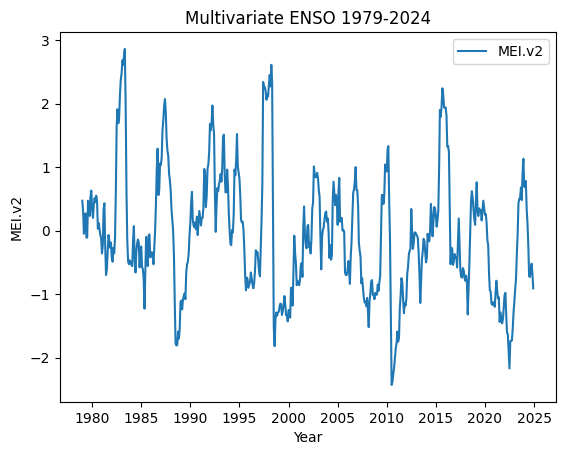

In [7]:
# import plotting package
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(meiv2['Date'],meiv2['value'], label='MEI.v2')
ax.set_title("Multivariate ENSO 1979-2024")
ax.set_xlabel("Year")
ax.set_ylabel("MEI.v2")
ax.legend()
plt.show()